In [2]:
# Data Collection Stage.

import torch
import torchvision
from torchvision import transforms

# Convert image to tensor.
transform = transforms.Compose([transforms.ToTensor()])

# Load the MNIST train dataset.
train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)

# Load the MNIST test dataset.
test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)

print(f"Number of train samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 471kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.77MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.26MB/s]

Number of train samples: 60000
Number of test samples: 10000


Epoch 1
Train Loss: 0.9052216846392607 and Eval Loss: 0.383466526960871
Epoch 2
Train Loss: 0.3357735397750889 and Eval Loss: 0.27423832565546036
Epoch 3
Train Loss: 0.25893238251174944 and Eval Loss: 0.2217935272047569
Epoch 4
Train Loss: 0.2145145658705471 and Eval Loss: 0.19058244855730397
Epoch 5
Train Loss: 0.18264474262044564 and Eval Loss: 0.16503897549845514
Epoch 6
Train Loss: 0.15967447044593946 and Eval Loss: 0.14033068524329526
Epoch 7
Train Loss: 0.1421215188111673 and Eval Loss: 0.12606575433016534
Epoch 8
Train Loss: 0.12794432310816417 and Eval Loss: 0.11453692054755654
Epoch 9
Train Loss: 0.11615893088761708 and Eval Loss: 0.10825238537316205
Epoch 10
Train Loss: 0.10706128315456005 and Eval Loss: 0.10395456592857862
Epoch 11
Train Loss: 0.09958432653178173 and Eval Loss: 0.09203680018541421
Epoch 12
Train Loss: 0.09351881412662137 and Eval Loss: 0.08996765711493078
Epoch 13
Train Loss: 0.08697223372912324 and Eval Loss: 0.09062450183822424
Epoch 14
Train Loss: 0.08235

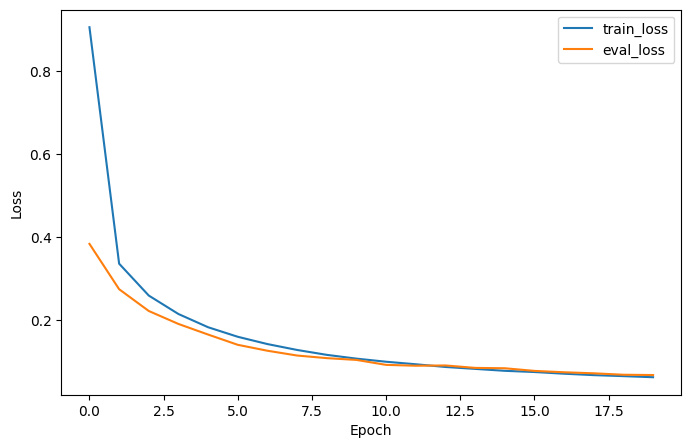

In [3]:
# Model training stage.

import matplotlib.pyplot as plt

class MultiClassification(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MultiClassification, self).__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(in_channels=8, out_channels=4, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Flatten(),
            torch.nn.Linear(4*7*7, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 10),
        )

    def forward(self, x):
      return self.model(x)


learning_rate = 0.0002
model = MultiClassification(784, 10)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

train_losses = []
val_losses = []
for epoch in range(20):
  print(f"Epoch {epoch+1}")
  model.train()
  train_loss = 0
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    train_loss+=loss.item()

  eval_loss = 0
  model.eval()
  with torch.no_grad():
    for data, target in val_loader:
      output = model(data)
      loss = criterion(output, target)
      eval_loss+=loss.item()

  print(f"Train Loss: {train_loss/len(train_loader)} and Eval Loss: {eval_loss/len(val_loader)}")
  train_losses.append(train_loss/len(train_loader))
  val_losses.append(eval_loss/len(val_loader))


def plot_losses(train_losses, val_losses):
  plt.figure(figsize=(8, 5))
  plt.plot(train_losses, label='train_loss')
  plt.plot(val_losses, label='eval_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
plot_losses(train_losses, val_losses)


In [12]:
# Evaluation Stage
# Compute precision and recall.

precision = 0
for data, target in train_loader:
    output = model(data)
    output.argmax(dim=1)
    precision += (output.argmax(dim=1) == target).sum().item()/len(target)
print(f"Train Precision: {precision/len(train_loader)}")

precision = 0
for data, target in val_loader:
    output = model(data)
    output.argmax(dim=1)
    precision += (output.argmax(dim=1) == target).sum().item()/len(target)
print(f"Val Precision: {precision/len(val_loader)}")

Train Precision: 0.9828424840085288
Val Precision: 0.979796974522293
